<a href="https://colab.research.google.com/github/randy-tsukemen/Data_science_roadmap/blob/master/Practicing_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning


## Regression: feature selection
### Selecting the correct features:
- Reduces overfitting
- Improves accuracy
- Increases interpretability
- Reduces training time

### Feature selection methods
- Filter: Rank features based on statistical performance
- Wrapper: Use an ML method to evaluate performance
- Embedded: Iterative model training to extract features
- Feature importance: tree-based ML models


### Compare and contrast methods
|Method |Use an ML model |Select best subset |Can overfit|
| -------- | -------- | -------- | -------- |
|Filter |No |No |No|
|Wrapper |Yes |Yes |Sometimes|
|Embedded |Yes |Yes |Yes|
|Feature importance |Yes |Yes |Yes|

### Correlation coeficient statistical tests
|Feature/Response |Continuous |Categorical|
| -------- | -------- | -------- |
|Continuous |Pearson's Correlation |LDA|
|Categorical |ANOVA |Chi-Square|

### load data

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# load data
url = "https://assets.datacamp.com/production/repositories/4983/datasets/97f3248581b7272784d23df9c30612d9eb0afb8d/diabetes.csv"
diabetes = pd.read_csv(url)
X = diabetes.drop(columns=["progression"])
y = diabetes["progression"]

### Filter functions
|Function |returns|
|---|---|
|df.corr() |Pearson's correlation matrix|
|sns.heatmap(corr_object) |heatmap plot|
|abs() |absolute value|

                  age       sex       bmi  ...        s5        s6  progression
age          1.000000  0.173737  0.185085  ...  0.270777  0.301731     0.187889
sex          0.173737  1.000000  0.088161  ...  0.149918  0.208133     0.043062
bmi          0.185085  0.088161  1.000000  ...  0.446159  0.388680     0.586450
bp           0.335427  0.241013  0.395415  ...  0.393478  0.390429     0.441484
s1           0.260061  0.035277  0.249777  ...  0.515501  0.325717     0.212022
s2           0.219243  0.142637  0.261170  ...  0.318353  0.290600     0.174054
s3          -0.075181 -0.379090 -0.366811  ... -0.398577 -0.273697    -0.394789
s4           0.203841  0.332115  0.413807  ...  0.617857  0.417212     0.430453
s5           0.270777  0.149918  0.446159  ...  1.000000  0.464670     0.565883
s6           0.301731  0.208133  0.388680  ...  0.464670  1.000000     0.382483
progression  0.187889  0.043062  0.586450  ...  0.565883  0.382483     1.000000

[11 rows x 11 columns]


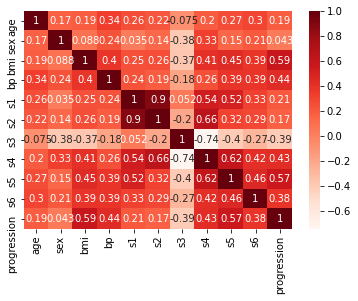

bmi            0.586450
s5             0.565883
progression    1.000000
Name: progression, dtype: float64


In [58]:
# Create correlation matrix and print it
cor = diabetes.corr()
print(cor)

# Correlation matrix heatmap
plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable
cor_target = abs(cor["progression"])

# Selecting highly correlated features
best_features = cor_target[cor_target > 0.5]
print(best_features)

### Wrapper methods
1. Forward selection (LARS-least angle regression)
    - Starts with no features, adds one at a time
2. Backward elimination
    - Starts with all features, eliminates one at a time
3. Forward selection/backward elimination combination (bidirectional elimination)
4. Recursive feature elimination
    - RFECV

In [59]:
# Import modules
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)

[ True False  True  True  True  True  True  True  True  True]
[1 2 1 1 1 1 1 1 1 1]
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [60]:
# Import modules
from sklearn.linear_model import LarsCV

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)

# Drop feature suggested not important in step 2
X_ = X.drop('sex', axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X_, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X_, y))
print(lars_mod.alpha_)

0.5000547926397778
0.16078158387263866
0.4982900996498095
0.05226862285159132


### Tree-based feature importance methods
- Random Forest --> `sklearn.ensemble.RandomForestRegressor`
- Extra Trees --> `sklearn.ensemble.ExtraTreesRegressor`
- After model fit --> `tree_mod.feature_importances_`

|Function |returns|
|---|---|
|`sklearn.svm.SVR` |support vector regression estimator|
|`sklearn.feature_selection.RFECV` |recursive feature elimination with cross-val|
|`rfe_mod.support_` |boolean array of selected features|
|`ref_mod.ranking_` |feature ranking, selected=1|
|`sklearn.linear_model.LinearRegression` |linear model estimator|
|`sklearn.linear_model.LarsCV` |least angle regression with cross-val|
|`LarsCV.score` |r-squared score|
|`LarsCV.alpha_` |estimated regularization parameter|

In [61]:
# Import
from sklearn.ensemble import RandomForestRegressor

# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=123, 
              n_estimators=100, oob_score=True)

# Fit
rf_mod.fit(X, y)

# Print
print(diabetes.columns)
print(rf_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.         0.         0.39961579 0.03085607 0.         0.00128948
 0.00700339 0.00417891 0.53899467 0.01806168]


In [62]:
# Import
from sklearn.ensemble import ExtraTreesRegressor

# Instantiate
xt_mod = ExtraTreesRegressor()

# Fit
xt_mod.fit(X, y)

# Print
print(diabetes.columns)
print(xt_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.05473393 0.03472872 0.24159732 0.12223411 0.05151638 0.04910916
 0.0682527  0.08233463 0.22133116 0.07416188]


### Embedded methods
1. Lasso Regression
2. Ridge Regression
3. ElasticNet


In [63]:
# Import modules
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated lasso, fit
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Instantiate lasso, fit, predict and print MSE
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test)))

2924.5859832897386


In [64]:
lasso.coef_

array([  10.44337568, -258.78524547,  540.21142005,  278.38304827,
       -709.64812829,  359.72602008,   98.8273001 ,  285.87174613,
        631.99600104,  101.92074238])

In [65]:
# Import modules
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
import numpy as np


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated ridge, fit
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(X_train, y_train)

# Instantiate ridge, fit, predict and print MSE
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))

2970.874355984401


In [66]:
ridge.coef_

array([  20.02724484, -210.65528196,  490.6483936 ,  252.31304807,
        -85.60007846,  -84.365296  , -174.9700292 ,  177.80527284,
        371.44401874,  117.87370481])

## Classification: feature engineering

### Feature engineering...why?
- Extracts additional information from the data
- Creates additional relevant features
- One of the most effective ways to improve predictive models

### Benefits of feature engineering
- Increased predictive power of the learning algorithm
- Makes your machine learning models perform even better!

### Types of feature engineering
- Indicator variables
- Interaction features
- Feature representation

### Indicator variables
- Threshold indicator
    - age: high school vs college
- Multiple features
    - used as a flag
- Special events
    - black Friday
    - Christmas
- Groups of classes
    - website traffic paid flag
        - Google adwords
        - Facebook ads

### Interaction features
- Sum
- Difference
- Product
- Quotient
- Other mathematical combos

### Feature representation
- Datetime stamps
    - Day of week
    - Hour of day
- Grouping categorical levels into 'Other'
- Transform categorical to dummy variables
    - (k - 1) binary columns

### Different categorical levels
- Training data:
    - model trained with [red, blue, green]
- Test data:
    - model test with [red, green, yellow]
    - additional color not seen in training
    - one color missing
- [Robust one-hot encoding](https://blog.cambridgespark.com/robust-one-hot-encoding-in-python-3e29bfcec77e)
- [Handling Categorical Data in Python](https://www.datacamp.com/community/tutorials/categorical-data)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

url = "https://assets.datacamp.com/production/repositories/4983/datasets/db66797c50f6938065374e9a31353053fb542052/LoansTrainingSetReduced.csv"
# url = "https://assets.datacamp.com/production/repositories/4983/datasets/a6979e58c5990487b6843a07ebe5143af74d7913/loan_missing_filled.csv"
loan_data = pd.read_csv(url)

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
scaler = StandardScaler()
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)
loans_imp_meanDF = pd.DataFrame(scaler.fit_transform(loans_imp_meanDF), columns=numeric_cols.columns)
# Create X matrix and y array
X = loans_imp_meanDF.select_dtypes(include=[np.number])
y = loan_data["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic = LogisticRegression()

# Fit
logistic.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic.predict(X_test)))

0.7293142878566341


Debt to income ratio

- Monthly Debt
- Annual Income/12

In [80]:
# Create dti_ratio variable
monthly_income = loan_data["Annual Income"]/12
loan_data["dti_ratio"] = loan_data["Monthly Debt"]/monthly_income * 100
loan_data = loan_data.drop(["Monthly Debt","Annual Income"], axis=1)

# Replace target variable levels
loan_data["Loan Status"] = loan_data["Loan Status"].replace({'Fully Paid': 0, 
                                            'Charged Off': 1})
loan_data = loan_data[['Loan Status', 'Current Loan Amount', 'Credit Score', 'Years in current job', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'dti_ratio']]
# One-hot encode categorical variables
loan_data = pd.get_dummies(data=loan_data)

# Print
print(loan_data.columns)

Index(['Loan Status', 'Current Loan Amount', 'Credit Score',
       'Years in current job', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'dti_ratio'],
      dtype='object')


In [92]:
# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
scaler = StandardScaler()
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)
loans_imp_meanDF = pd.DataFrame(scaler.fit_transform(loans_imp_meanDF), columns=numeric_cols.columns)

# Create X matrix and y array
X = loans_imp_meanDF.select_dtypes(include=[np.number])
y = loan_data["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic_dti = LogisticRegression()

# Fit
logistic_dti.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic_dti.predict(X_test)))

1.0


In [82]:
X_train

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,dti_ratio
69101,1.591213,-0.408333,4.766901e-01,-0.756366,-0.498687,4.789240e-16,-0.624764,1.772105,0.028388,0.035439,-0.328558,3.773606,-3.157195e-01
40731,-0.628451,-0.409019,1.020377e+00,1.189261,1.685978,4.789240e-16,1.785633,-0.338742,0.335836,0.351548,-0.328558,-0.109592,-1.431910e+00
44310,-0.628451,-0.409003,-2.761073e-01,1.189261,-1.179622,4.789240e-16,-0.223032,-0.338742,-0.618148,-0.090892,-0.328558,-0.109592,-7.615892e-01
65255,-0.628451,-0.408355,7.694446e-01,1.189261,-0.115661,2.151470e+00,0.178701,-0.338742,-0.128439,-0.032532,-0.328558,-0.109592,9.357060e-01
88739,1.591213,-0.408867,-4.918358e+00,0.077474,-1.222180,1.293934e-01,-0.223032,-0.338742,-0.475106,-0.091055,-0.328558,-0.109592,5.042034e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63206,-0.628451,-0.408898,6.439784e-01,1.189261,1.161091,-9.490476e-01,-0.223032,-0.338742,-0.528315,-0.096917,-0.328558,-0.109592,-5.026999e-01
61404,1.591213,-0.409164,7.276226e-01,1.189261,3.090406,6.012114e-01,0.580434,-0.338742,-0.304850,-0.032182,-0.328558,-0.109592,1.194591e+00
17730,-0.628451,2.445384,-3.179294e-01,-1.451233,1.302952,4.789240e-16,-1.227364,1.772105,-0.636155,-0.109184,2.587512,-0.109592,-8.047519e-01
28030,-0.628451,-0.409034,4.754620e-15,-0.478419,-1.037760,4.789240e-16,-0.423898,-0.338742,-0.183885,-0.074651,-0.328558,-0.109592,5.110223e-16


## Ensemble learning techniques
- Bootstrap Aggregation
- Boosting
- Model stacking

Bias-Variance Trade-Off
![](https://i.imgur.com/Esfeuap.png)

#### Bagging (Bootstrap aggregation)

- Bootstrapped samples
  - Subset selected with replacement
  - Same row of data may be chosen
- Model built for each sample
- Average the output
- Reduces variance

In [83]:
from sklearn.ensemble import BaggingClassifier
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(X_train, y_train)

# Predict
bagged_pred = bagged_model.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, bagged_pred))

1.0


#### Boosting
- Multiple models built sequentially
- Incorrect predictions are weighted
- Reduces bias


#### Model stacking
- Model 1 predictions
- Model 2 predictions...
- Model N predictions
- Stack for highest accuracy model
  - Uses base model (Model N) predictions as input to 2nd level model

In [84]:
from sklearn.ensemble import AdaBoostClassifier
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(X_train, y_train)

# Predict
boosted_pred = boosted_model_fit.predict(X_test)

# Print model accuracy
print(accuracy_score(y_test, boosted_pred))

1.0


In [85]:
import xgboost
# Instantiate
xgb = xgboost.XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(X_train, y_train)

# Predict
xgb_pred = xgb.predict(X_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(y_test, xgb_pred))

Final prediction score: [1.00000000]


# Unsupervised Learning

## Dimensionality reduction: feature extraction

### Why dimensionality reduction?
1. Speed up ML training
2. Visualization
3. Improves accuracy
4. Curse of dimensionality
5. Dimensionality reduction != feature selection

### Unsupervised learning methods

- Principal component analysis (PCA)
- Singular value decomposition (SVD)
- Clustering/grouping
- Exploratory data mining

#### PCA
- Relationship between X and y
- Calculated by finding principal axes
- Translates, rotates and scales
- Lower-dimensional projection of the data

In [94]:
# Import module
from sklearn.decomposition import PCA

# Feature matrix and target array
X_diabetes = diabetes.drop('progression', axis=1)
y_diabetes = diabetes['progression']

# PCA
pca = PCA(n_components=3)

# Fit and transform
principalComponents = pca.fit_transform(X_diabetes)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


#### SVD
- Linear algebra and vector calculus
- Decomposes data matrix into three matrices
- Results in 'singular' values
- Variance in data approximately equals SS of singular values

In [95]:
# Import module
from sklearn.decomposition import TruncatedSVD

# Feature matrix and target array
X_diabetes = diabetes.drop('progression', axis=1)
y_diabetes = diabetes['progression']

# SVD
svd = TruncatedSVD(n_components=3)

# Fit and transform
principalComponents = svd.fit_transform(X_diabetes)

# Print ratio of variance explained
print(svd.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


### Visualization techniques
- PCA
- t-SNE

In [0]:
# PCA
pca = PCA(n_components=2)

# Fit and transform
loan_data_PCA = pca.fit_transform(X)

loan_data_PCA = pd.DataFrame(loan_data_PCA)
loan_data_PCA['Loan Status'] = y
loan_data_PCA.columns = ['principal component 1', 'principal component 2', 'Loan Status']


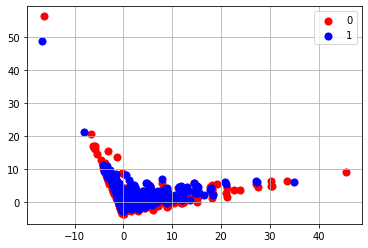

In [97]:
targets = [0, 1]
colors = ['r', 'b']

__, ax = plt.subplots()
# For loop to create plot
for target, color in zip(targets, colors):
    indicesToKeep = loan_data_PCA['Loan Status'] == target
    ax.scatter(loan_data_PCA.loc[indicesToKeep, 'principal component 1']
               , loan_data_PCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

# Legend    
ax.legend(targets)
ax.grid()
plt.show()

In [0]:
# Instantiate
pca = PCA(n_components=10)

# Fit and transform
principalComponents = pca.fit_transform(X)

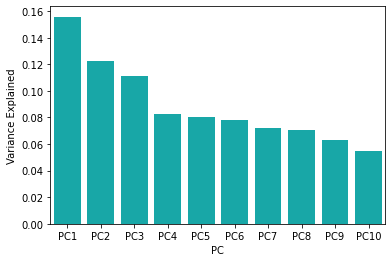

In [99]:
# List principal components names
principal_components = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

# Create a DataFrame
pca_df = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_,
             'PC':principal_components})

# Plot DataFrame
sns.barplot(x='PC',y='Variance Explained', 
           data=pca_df, color="c")
plt.show()

In [100]:
# Instantiate, fit and transform
pca2 = PCA()
principalComponents2 = pca2.fit_transform(X)

# Assign variance explained
var = pca2.explained_variance_ratio_
var

array([0.1557788 , 0.12270887, 0.11136689, 0.08256175, 0.08014548,
       0.07831086, 0.07192525, 0.07050285, 0.06269886, 0.05458465,
       0.05266004, 0.0515721 , 0.00518359])

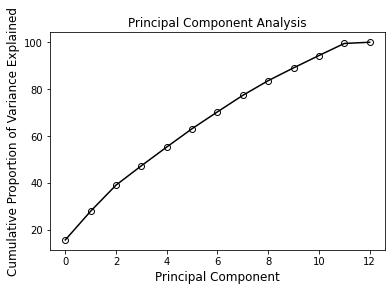

In [101]:
# Plot cumulative variance
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()

## Clustering algorithms
- Features >> Observations
- Model training more challenging
- Rely on distance calculations
- Most commonly used unsupervised technique

### Practical applications of clustering
- Customer segmentation
- Document classification
- Insurance/transaction fraud detection
- Image segmentation
- Anomaly detection

### K-means
1. Initial centroids
2. Assign each observation to nearest centroid
3. Create new centroids
4. Repeat steps 2 and 3

### Hierarchical agglomerative clustering
Agglomerative clustering linkage

- Ward linkage
- Maximum/complete linkage
- Average linkage
- Single linkage

### Selecting a clustering algorithm
- Cluster stability assessment
- K-means and HC use Euclidian distance
- Inter- and intra-cluster distances

"An appropriate dissimilarity measure is far
more important in obtaining success with
clustering than choice of clustering algorithm." -
from Elements of Statistical Learning
http://www-stat.stanford.edu/~tibs/ElemStatLearn/